In [2]:
import csv
import pandas as pd


candydata = pd.read_csv(r'/Users/christinemagnotta/candydata.csv')
print(candydata)

#Importing candydata

   State            Top Candy   Pounds         Second Place  Pounds.1  \
0     AK                 Twix     4908            Milky Way      4072   
1     AL           Candy Corn   115269            Starburst    111280   
2     AR       Jolly Ranchers   228645         Butterfinger    201845   
3     AZ          Hot Tamales   751772       Hershey Kisses    732991   
4     CA             Skittles  1509827         Reese's Cups   1059223   
5     CO       Hershey Kisses   129826                 Twix    127840   
6     CT            Milky Way     2987           Almond Joy      2278   
7     DC                M&M's    27546         Tootsie Pops     24725   
8     DE             Skittles    21336          Life Savers     16703   
9     FL             Skittles   598285         Reese's Cups    501926   
10    GA         Swedish Fish   145827       Jolly Ranchers    124872   
11    HI             Skittles    28091  Hershey's Mini Bars     25783   
12    IA                M&M's    67829         Rees

In [3]:
candydata.head() #I seem to have an extra column, Unamed:10

,State,Top Candy,Pounds,Second Place,Pounds.1,Third Place,Pounds.2,State Total,Population (in Millions),Pounds Per Million,Unnamed: 10
0,AK,Twix,4908,Milky Way,4072,Blow Pops,3988,12968,0.7,18525.71429,NaN
1,AL,Candy Corn,115269,Starburst,111280,Skittles,98771,325320,4.9,66391.83673,NaN
2,AR,Jolly Ranchers,228645,Butterfinger,201845,Skittles,76353,506843,3.0,168947.66670,NaN
3,AZ,Hot Tamales,751772,Hershey Kisses,732991,Snickers,682562,2167325,7.3,296893.83560,NaN
4,CA,Skittles,1509827,Reese's Cups,1059223,M&M's,1009388,3578438,39.5,90593.36709,NaN


In [7]:
candydata = candydata.drop(columns=['Unnamed: 10']) #dropped extra column

In [8]:
for col in candydata.columns: 
    print(col)   #checking for extra column/making sure it got dropped.

State
Top Candy
Pounds
Second Place
Pounds.1
Third Place
Pounds.2
State Total
Population (in Millions)
Pounds Per Million


In [10]:
candydata.head() #I pre-sorted the data, using Excel, and summed up the amount of candy consumed by each state, and then added the population, in millions.
#The final column is the amount of candy eaten, per 1 million people.
#Pounds = the amount, in pounds, of the candy's top seller.
#Pounds.1 = the amount of the state's second most purchased candy.
#Pounds.2 = the amount of the state's third most purchased candy.
#This isn't a comprehensive table that measures ALL candy consumed by the people of state.


,State,Top Candy,Pounds,Second Place,Pounds.1,Third Place,Pounds.2,State Total,Population (in Millions),Pounds Per Million
0,AK,Twix,4908,Milky Way,4072,Blow Pops,3988,12968,0.7,18525.71429
1,AL,Candy Corn,115269,Starburst,111280,Skittles,98771,325320,4.9,66391.83673
2,AR,Jolly Ranchers,228645,Butterfinger,201845,Skittles,76353,506843,3.0,168947.66670
3,AZ,Hot Tamales,751772,Hershey Kisses,732991,Snickers,682562,2167325,7.3,296893.83560
4,CA,Skittles,1509827,Reese's Cups,1059223,M&M's,1009388,3578438,39.5,90593.36709


In [173]:
candydata.at[14,'Top Candy'] 
#In case you're wondering about Illinois


'Sour Patch Kids'

In [11]:
candydata.describe()

,Pounds,Pounds.1,Pounds.2,State Total,Population (in Millions),Pounds Per Million
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,51.000000
mean,1.728749e+05,1.498949e+05,1.178353e+05,4.406052e+05,6.427451,80716.867501
std,2.649698e+05,2.168891e+05,1.871003e+05,6.653103e+05,7.354892,68536.731254
min,2.987000e+03,2.278000e+03,1.582000e+03,6.847000e+03,0.600000,1956.285714
25%,4.251650e+04,3.776450e+04,3.331600e+04,1.151090e+05,1.800000,37687.752135
50%,9.572700e+04,8.973400e+04,6.382900e+04,2.488730e+05,4.500000,61912.777780
75%,1.677455e+05,1.468350e+05,1.033225e+05,4.263460e+05,7.450000,102821.904800
max,1.509827e+06,1.059223e+06,1.009388e+06,3.578438e+06,39.500000,296893.835600


In [15]:
#Now I want to see what state has the most candy bought.
#This is giving me the reverse order.

candydata.groupby(by="Pounds Per Million").max()

,State,Top Candy,Pounds,Second Place,Pounds.1,Third Place,Pounds.2,State Total,Population (in Millions)
Pounds Per Million,,,,,,,,,
1956.285714,CT,Milky Way,2987,Almond Joy,2278,M&M's,1582,6847,3.5
11879.743590,OK,Dubble Bubble Gum,19232,Skittles,14990,Snickers,12109,46331,3.9
15354.500000,MD,Reese's Cups,36887,Hershey Kisses,30423,Milky Way,24817,92127,6.0
18401.128210,NY,Sour Patch Kids,150325,Hot Tamales,142677,Candy Corn,65820,358822,19.5
18525.714290,AK,Twix,4908,Milky Way,4072,Blow Pops,3988,12968,0.7
19471.311480,MO,Milky Way,45221,Almond Joy,36782,Dubble Bubble Gum,36772,118775,6.1
21103.823530,TN,Tootsie Pops,55627,Salt Water Taffy,48888,Skittles,38991,143506,6.8
23702.190480,NC,Reese's Cups,85779,Snickers,84322,M&M's,78772,248873,10.5
27665.507250,MA,Sour Patch Kids,70772,Butterfinger,72838,Dubble Bubble Gum,47282,190892,6.9


In [36]:
topcandydata = candydata.groupby(by="Pounds Per Million").max()

In [44]:
topcandydata.sort_values(by = "Pounds Per Million", ascending=False)

,State,Top Candy,Pounds,Second Place,Pounds.1,Third Place,Pounds.2,State Total,Population (in Millions)
Pounds Per Million,,,,,,,,,
296893.835600,AZ,Hot Tamales,751772,Hershey Kisses,732991,Snickers,682562,2167325,7.3
285771.875000,UT,Jolly Ranchers,413099,Tootsie Pops,260378,Candy Corn,240993,914470,3.2
263636.774200,NV,Hershey Kisses,310974,Hot Tamales,286464,Candy Corn,219836,817274,3.1
218405.862100,KS,Reese's Cups,229857,M&M's,213784,Snickers,189736,633377,2.9
210581.250000,ND,Candy Corn,61837,Hot Tamales,56745,Jolly Ranchers,49883,168465,0.8
168947.666700,AR,Jolly Ranchers,228645,Butterfinger,201845,Skittles,76353,506843,3.0
131858.333300,VT,Skittles,34670,M&M's,24536,Milky Way,19909,79115,0.6
118063.571400,NH,M&M's,69692,Starburst,59822,Jolly Ranchers,35775,165289,1.4
117810.526300,NE,Sour Patch Kids,98486,Salt Water Taffy,89734,Twix,35620,223840,1.9


In [45]:
#Now we can see that the states purchasing the most candy per person are Arizona, Utah, Nevada, Kansas and North Dakota.
#The amount purchased is in pounds. 



In [65]:
import matplotlib.pyplot as plt

In [73]:
candyplot = topcandydata.reset_index("Pounds Per Million") #Resetting the index so that I can plot with Pounds Per Million

In [72]:
for col in candyplot.columns: 
    print(col)

Pounds Per Million
State
Top Candy
Pounds
Second Place
Pounds.1
Third Place
Pounds.2
State Total
Population (in Millions)


In [79]:
poundsPerState = candyplot[["State", "Pounds Per Million"]]

In [85]:
poundsPerState

,State,Pounds Per Million
0,CT,1956.285714
1,OK,11879.743590
2,MD,15354.500000
3,NY,18401.128210
4,AK,18525.714290
5,MO,19471.311480
6,TN,21103.823530
7,NC,23702.190480
8,MA,27665.507250
9,MI,32860.606060


In [102]:
topState = poundsPerState[40:50]

<BarContainer object of 10 artists>

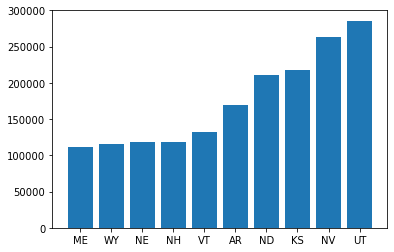

In [104]:
plt.bar(topState['State'], topState['Pounds Per Million'])

#Here's a bar graph of the state's purchasing the most candy.
#People in Utah purchase almost three times as much candy as people in Maine, which is number 10 in the top purchaing states list.
#Nevada is up there, too, with about 2.5 times as much candy as Maine.

<BarContainer object of 12 artists>

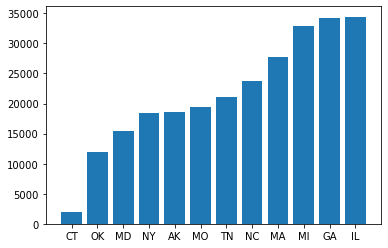

In [107]:
bottomState = poundsPerState[0:12]
plt.bar(bottomState['State'], bottomState['Pounds Per Million'])

#The states purchasing the last candy, in pounds, per person, is Connecticut.
#Also at the bottom of this list is Oklahoma, Maryland and New York.
#As you can see, Il is 12th from the bottom.

In [124]:
candydata.head()

,State,Top Candy,Pounds,Second Place,Pounds.1,Third Place,Pounds.2,State Total,Population (in Millions),Pounds Per Million
3,AZ,Hot Tamales,751772,Hershey Kisses,732991,Snickers,682562,2167325,7.3,296893.8356
44,UT,Jolly Ranchers,413099,Tootsie Pops,260378,Candy Corn,240993,914470,3.2,285771.8750
33,NV,Hershey Kisses,310974,Hot Tamales,286464,Candy Corn,219836,817274,3.1,263636.7742
16,KS,Reese's Cups,229857,M&M's,213784,Snickers,189736,633377,2.9,218405.8621
28,ND,Candy Corn,61837,Hot Tamales,56745,Jolly Ranchers,49883,168465,0.8,210581.2500


In [133]:
topCandy = candydata[["Top Candy", "Pounds"]]

In [134]:
topCandy

,Top Candy,Pounds
3,Hot Tamales,751772
44,Jolly Ranchers,413099
33,Hershey Kisses,310974
16,Reese's Cups,229857
28,Candy Corn,61837
2,Jolly Ranchers,228645
46,Skittles,34670
30,M&M's,69692
29,Sour Patch Kids,98486
50,Salt Water Taffy,25864


In [140]:
topCandySales = topCandy.groupby('Top Candy').sum()

In [143]:
topCandySales

,Pounds
Top Candy,
3 Musketeers,95727
Blow Pops,170236
Butterfinger,119664
Candy Corn,292375
Dubble Bubble Gum,49005
Hershey Kisses,440800
Hershey's Mini Bars,315429
Hot Tamales,751772
Jolly Ranchers,721836


In [156]:
secondCandy = candydata[["Second Place", "Pounds.1"]]

In [157]:
secondCandy

,Second Place,Pounds.1
3,Hershey Kisses,732991
44,Tootsie Pops,260378
33,Hot Tamales,286464
16,M&M's,213784
28,Hot Tamales,56745
2,Butterfinger,201845
46,M&M's,24536
30,Starburst,59822
29,Salt Water Taffy,89734
50,Reese's Cups,24790


In [153]:
for col in secondCandy.columns: 
    print(col)   #checking for extra column/making sure it got dropped.

Third Place
Pounds.2


In [158]:
secondPlaceSales = secondCandy.groupby('Second Place').sum()

In [161]:
secondPlaceSales

,Pounds.1
Second Place,
Almond Joy,39060
Blow Pops,140636
Butterfinger,372955
Candy Corn,74637
Hershey Kisses,763414
Hershey's Mini Bars,25783
Hot Tamales,732517
Jolly Ranchers,144089
Kit Kat,139723


In [150]:
thirdCandy = candydata[["Third Place", "Pounds.2"]] 

In [151]:
thirdCandy

,Third Place,Pounds.2
3,Snickers,682562
44,Candy Corn,240993
33,Candy Corn,219836
16,Snickers,189736
28,Jolly Ranchers,49883
2,Skittles,76353
46,Milky Way,19909
30,Jolly Ranchers,35775
29,Twix,35620
50,Dubble Bubble Gum,18776


In [162]:
thirdPlaceSales = thirdCandy.groupby('Third Place').sum()

In [163]:
thirdPlaceSales

,Pounds.2
Third Place,
Blow Pops,23815
Butterfinger,89657
Candy Corn,939432
Dubble Bubble Gum,102830
Hot Tamales,97577
Jolly Ranchers,160866
M&M's,1288564
Milky Way,246075
Reese's Cups,175421


In [174]:
candySalesDF = [topCandySales, secondPlaceSales, thirdPlaceSales]

In [177]:
candySalesDF

[                      Pounds
 Top Candy                   
 3 Musketeers           95727
 Blow Pops             170236
 Butterfinger          119664
 Candy Corn            292375
 Dubble Bubble Gum      49005
 Hershey Kisses        440800
 Hershey's Mini Bars   315429
 Hot Tamales           751772
 Jolly Ranchers        721836
 Lemonheads            115789
 M&M's                 254839
 Milky Way              48208
 Reese's Cups          352523
 Salt Water Taffy       25864
 Skittles             2383036
 Snickers              165255
 Sour Patch Kids       555323
 Starburst            1311834
 Swedish Fish          221081
 Tootsie Pops          403291
 Twix                   22735,
                      Pounds.1
 Second Place                 
 Almond Joy              39060
 Blow Pops              140636
 Butterfinger           372955
 Candy Corn              74637
 Hershey Kisses         763414
 Hershey's Mini Bars     25783
 Hot Tamales            732517
 Jolly Ranchers         144089